Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 0.0202 - val_loss: 0.0018
Epoch 2/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.0011 - val_loss: 7.8477e-04
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - loss: 6.2679e-04 - val_loss: 5.4696e-04
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 5.5925e-04 - val_loss: 5.3171e-04
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 4.6813e-04 - val_loss: 4.4971e-04
Epoch 6/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - loss: 4.7526e-04 - val_loss: 3.7806e-04
Epoch 7/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - loss: 4.2335e-04 - val_loss: 8.2757e-04
Epoch 8/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 4.6671e-04 - val_loss: 4.0527e-04
Epoch 9/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 4.1006e-04 - val_loss: 3.8219e-04
Epoch 10/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 3.9809e-04 - val_loss: 4.5084e-04
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1272e-04
T

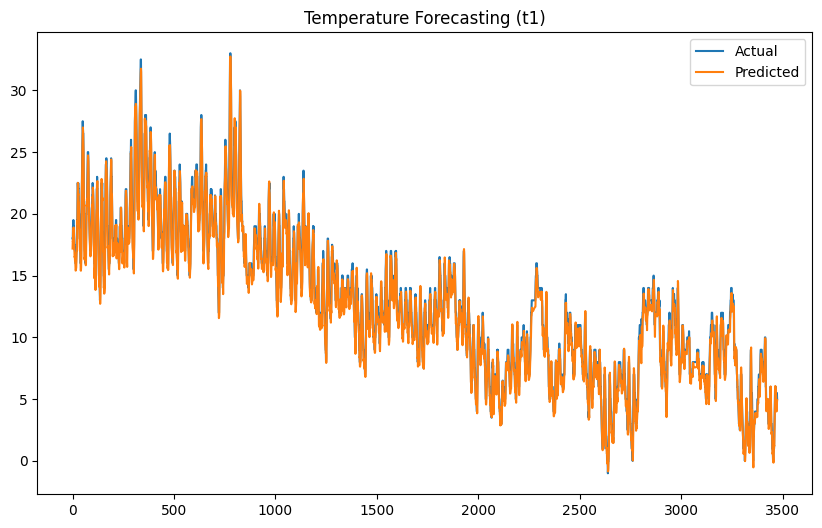

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

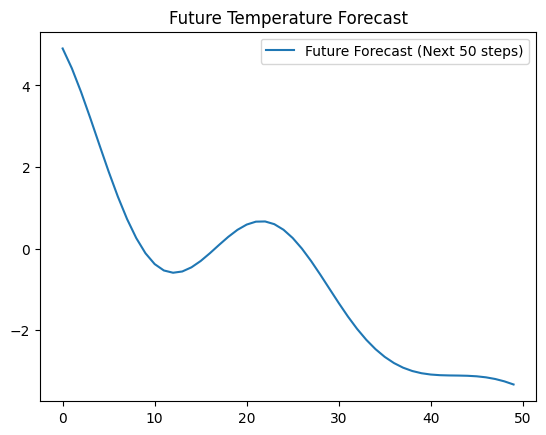

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Load dataset
df = pd.read_csv("/content/london_merged.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Step 2: Select the feature to forecast (temperature t1)
df = df[['t1']].dropna()

# Step 3: Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 50
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Step 5: Train/Test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 6: Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(SEQ_LENGTH, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Step 8: Evaluate
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Step 9: Plot predictions
predictions = model.predict(X_test)
predicted = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(10,6))
plt.plot(actual, label="Actual")
plt.plot(predicted, label="Predicted")
plt.title("Temperature Forecasting (t1)")
plt.legend()
plt.show()

# Step 10: Forecast future 50 steps
future_input = X_test[-1]
future_preds = []

for _ in range(50):
    pred = model.predict(future_input.reshape(1, SEQ_LENGTH, 1))
    future_preds.append(pred[0])
    future_input = np.append(future_input[1:], pred, axis=0)

future_preds = scaler.inverse_transform(future_preds)
plt.plot(future_preds, label="Future Forecast (Next 50 steps)")
plt.title("Future Temperature Forecast")
plt.legend()
plt.show()
